In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Envairomental Lapse Rate

(4000,) (4000,)


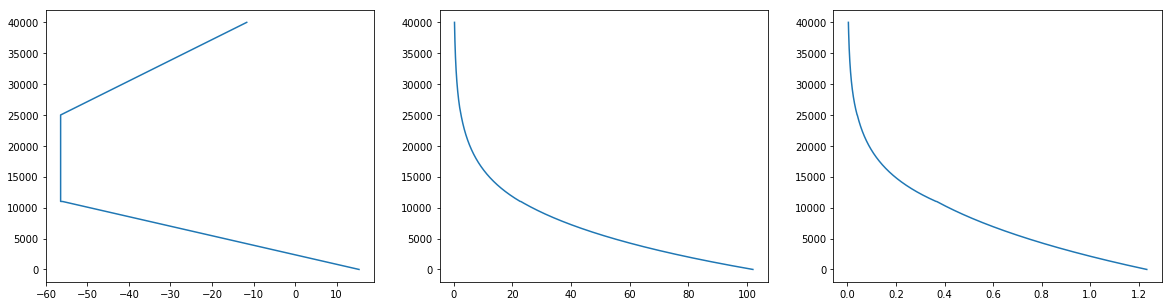

-11.639900000000011 0.2916861943014338 0.003888480299274148
-38.10193250000001 -22.55086491133022


In [77]:
def _troposhere(T_air, h, c_elr = 0.00649):
    T = T_air - c_elr*h
    p = 101.29 * ( (T + 273.1)/288.08 )**(5.256)
    return T, p

def _lower_stratosphere(h, T_init = -56.46 ):
    T = T_init * np.ones(h.shape)
    p = 22.65 * np.exp(1.73 - 0.000157 * h)
    return T, p

def _upper_stratosphere(h, T_init = -131.21, c_upper = 0.00299):
    T = T_init + c_upper * h
    p = 2.488 * ( (T + 273.1)/216.6 )**(-11.388)
    return T, p

def _earth_atmosphere_model(T_air, h_, h_troposphere = 11000, h_lower_stratosphere = 25000, h_upper_stratosphere = 40000):
    h_idx_troposphere_ = h_ < h_troposphere
    h_idx_lower_stratosphere = h_ < h_lower_stratosphere
    h_idx_lower_stratosphere = np.invert(h_idx_troposphere_) & h_idx_lower_stratosphere
    h_idx_upper_stratosphere = h_ >= h_lower_stratosphere


    T_troposhere_, p_troposhere_ = _troposhere(T_air, h_[h_idx_troposphere_])

    T_lower_stratosphere_, p_lower_stratosphere_ = _lower_stratosphere(h_[h_idx_lower_stratosphere])

    T_upper_stratosphere_, p_upper_stratosphere_ = _upper_stratosphere(h_[h_idx_upper_stratosphere])

    T_ = np.concatenate((T_troposhere_, T_lower_stratosphere_, T_upper_stratosphere_), axis = 0)
    p_ = np.concatenate((p_troposhere_, p_lower_stratosphere_, p_upper_stratosphere_), axis = 0)
    print(T_.shape, p_.shape)
    return T_, p_

def _density(T_, p_):
    rho_ = p_ / ( 0.2869 * (T_ + 273.1))
    return rho_
    

T_air = 15.4
h_ = np.arange(0., 40000., 10)
T_, p_ = _earth_atmosphere_model(T_air, h_)
rho_ = _density(T_, p_)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(T_, h_)
plt.subplot(132)
plt.plot(p_, h_)
plt.subplot(133)
plt.plot(rho_, h_)
plt.show()


print(T_[-1], p_[-1], rho_[-1])

print(np.average(T_), np.average(T_, weights = rho_))

# Dry Adiabatic Lapse Rate

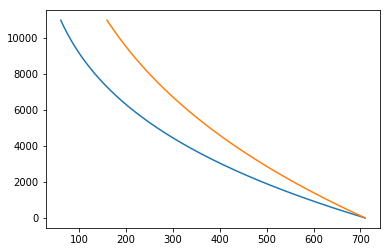

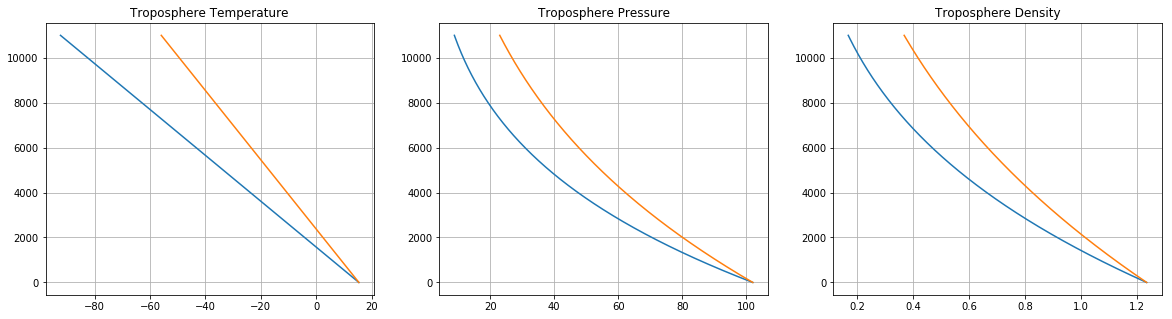

-38.451 468.35940400000004 -22.200357090289618
-20.26255 504.66355020000003 -13.328806546008202


In [11]:
def _troposhere_model(T_air, p_air, h, c = 0.0098):
    T = T_air - c*h
    p = p_air * ( (T + 273.1)/288.08 )**(5.256)
    r = _density(T, p)
    return T, p, r

def _density(T_, p_):
    rho_ = p_ / ( 0.2869 * (T_ + 273.1))
    return rho_

T_air = 15.4
p_air = 101.29
c_dalr = 0.0098
c_elr  = 0.00649
#1.996 kJ/kgK
C = 1.996

h_ = np.arange(0., 11000., 10)
T_dalr, p_dalr, r_dalr = _troposhere_model(T_air, p_air, h_, c = c_dalr)
T_elr, p_elr, r_elr = _troposhere_model(T_air, p_air, h_, c = c_elr)

Q_elr = r_elr * C*(T_elr + 273.1)
Q_elr = r_elr * C*(T_elr + 273.1)

plt.figure()
plt.plot(Q_dalr, h_)
plt.plot(Q_elr, h_)
plt.show()

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.title('Troposphere Temperature')
plt.plot(T_dalr, h_)
plt.plot(T_elr, h_)
plt.grid()
plt.subplot(132)
plt.title('Troposphere Pressure')
plt.plot(p_dalr, h_)
plt.plot(p_elr, h_)
plt.grid()
plt.subplot(133)
plt.title('Troposphere Density')
plt.plot(r_dalr, h_)
plt.plot(r_elr, h_)
plt.grid()
plt.show()

print(np.average(T_dalr), C*(np.average(T_dalr) + 273.1), np.average(T_dalr, weights = r_dalr))
print(np.average(T_elr), C*(np.average(T_elr) + 273.1), np.average(T_elr, weights = r_elr))

# Moist Adiabatic Lapse Rate

In [67]:
#1512677640	3.888888889	-10.22222222	768.858	2.042035225	0	35
# temperature of the saturated air, K
T = 3.888888889 + 273.1
T_d = -10.22222222 + 273.1
# the pressure of the saturated air
p = 768.858 * 133.322
R_humdity = 35
# Earth's gravitational acceleration = 9.8076 m/s2
g = 9.8076
# heat of vaporization of water = 2501000 J/kg
H_v = 2501000
# specific gas constant of dry air = 287 J/kg·K
R_sd = 287
# specific gas constant of water vapour = 461.5 J/kg·K
R_sw = 461.5
# the dimensionless ratio of the specific gas constant of dry air to the specific gas constant for water vapour = 0.622
epsilon = R_sd/R_sw
print(epsilon)
# the water vapour pressure of the saturated air
#e = epsilon * np.exp( (7.5 * T)/(273.3 + T) ) * 100 # Actual
e = epsilon * np.exp( (7.5 * T_d)/(273.3 + T_d) ) * 100 # Saturates 
# the mixing ratio of the mass of water vapour to the mass of dry air
r = (epsilon*e)/(p - e)
print(r)
# the specific heat of dry air at constant pressure, = 1003.5 J/kg·K
c_pd = 1003.5

0.6218851570964247
0.015281384277468614


In [68]:
gamma = g * ( (R_sd * T**2) + (H_v * r * T) ) / ( (c_pd * R_sd * T**2) + (H_v**2 * r * epsilon) )
print(gamma)

0.0039218177116870975


In [72]:
# Moist Adiabatic Lapse Rate
def _MALR(T, T_d, p):
    # Earth's gravitational acceleration = 9.8076 m/s2
    g = 9.8076
    # heat of vaporization of water = 2501000 J/kg
    H_v = 2501000
    # specific gas constant of dry air = 287 J/kg·K
    R_sd = 287
    # specific gas constant of water vapour = 461.5 J/kg·K
    R_sw = 461.5
    # the dimensionless ratio of the specific gas constant of dry air to the specific gas constant for water vapour = 0.622
    epsilon = R_sd/R_sw
    # the water vapour pressure of the saturated air
    #e = epsilon * np.exp( (7.5 * T)/(273.3 + T) ) * 100 # Actual
    e = epsilon * np.exp( (7.5 * T_d)/(273.3 + T_d) ) * 100 # Saturates in hPa but tansform to Pa
    # the mixing ratio of the mass of water vapour to the mass of dry air
    r = (epsilon*e)/(p - e)
    # the specific heat of dry air at constant pressure, = 1003.5 J/kg·K
    c_pd = 1003.5
    return g * ( (R_sd * T**2) + (H_v * r * T) ) / ( (c_pd * R_sd * T**2) + (H_v**2 * r * epsilon) )

# Celcius to Kelvin and mmHg to Pa
def _convert_units(T, T_d, p):
    return T + 273.15, T_d + 273.15, p * 133.322

# temperature of the saturated air in C
T = 3.888888889
# Dew point temperature in C
T_d = -10.22222222
# the pressure of the saturated air in Pascal
p = 768.858
T, T_d, p = _convert_units(T, T_d, p)
print(T, T_d, p)
gamma = _MALR(T, T_d, p)
print(gamma)

277.03888888899996 262.92777778 102505.686276
0.003922040853081034
